<a href="https://colab.research.google.com/github/KaRtHiK-56/ExploratoryDataAnalysis-Examples/blob/main/RedWineEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

# Project Documentation: Data Analysis of Red Wine Quality

## 1. Project Overview

### 1.1 Project Title
Data Analysis of Red Wine Quality

### 1.2 Project Description
This project focuses on analyzing the factors that influence the quality of red wine, utilizing a dataset derived from the UCI Machine Learning Repository. The goal is to identify key attributes that contribute to higher quality ratings and to develop predictive models that can estimate wine quality based on its chemical properties.

### 1.3 Objectives
- To explore the dataset and understand the distribution of variables.
- To identify the relationships between various chemical properties and wine quality.
- To visualize the findings and provide actionable insights.
- To build predictive models to estimate wine quality based on input features.

## 2. Dataset

### 2.1 Source
The dataset is sourced from the UCI Machine Learning Repository, specifically the “Wine Quality” dataset.

### 2.2 Dataset Description
The dataset contains 1,599 samples of red wine, with the following features:
- **Fixed acidity**: (g/dm³)
- **Volatile acidity**: (g/dm³)
- **Citric acid**: (g/dm³)
- **Residual sugar**: (g/dm³)
- **Chlorides**: (g/dm³)
- **Free sulfur dioxide**: (mg/dm³)
- **Total sulfur dioxide**: (mg/dm³)
- **Density**: (g/cm³)
- **pH**: (pH scale)
- **Sulphates**: (g/dm³)
- **Alcohol**: (% by volume)
- **Quality**: (score between 0 and 10)

### 2.3 Data Preprocessing
- **Missing Values**
- **Data Types**
- **Outlier Handling**
- **Normalization/Standardization**

## 3. Methodology

### 3.1 Exploratory Data Analysis (EDA)
- **Descriptive Statistics**: Summary statistics for each feature.
- **Visualizations**: Histograms, boxplots, and scatter plots to analyze the distribution and relationships.
- **Correlation Analysis**: Heatmaps to identify correlations between features and the target variable (quality).

### 3.2 Feature Selection
- **Techniques Used**: Utilized methods such as Analysis of Variance(Annova) and correlation matrix analysis to select significant features impacting wine quality.


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the dataset from the colab directory
df = pd.read_csv('winequality-white.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#shape of the dataset
df.shape

(4898, 12)

In [ ]:
# no. of elements in the dataset
df.size

58776

In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#statistical summary (Descriptive statistics)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Target value interpretation
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
#missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#duplicated
df.duplicated().sum()

937

In [ ]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [ ]:
#dropping the duplicated values
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3961, 12)

In [ ]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


************


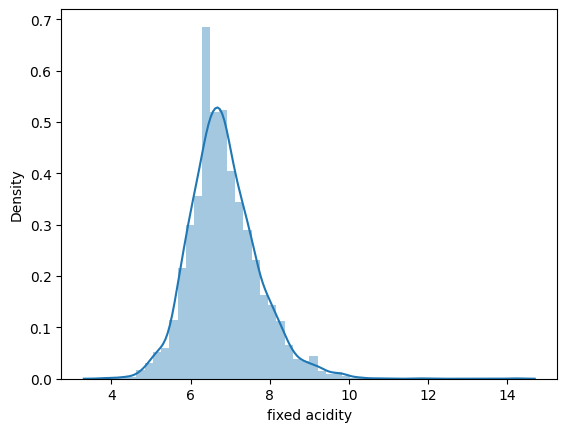

************


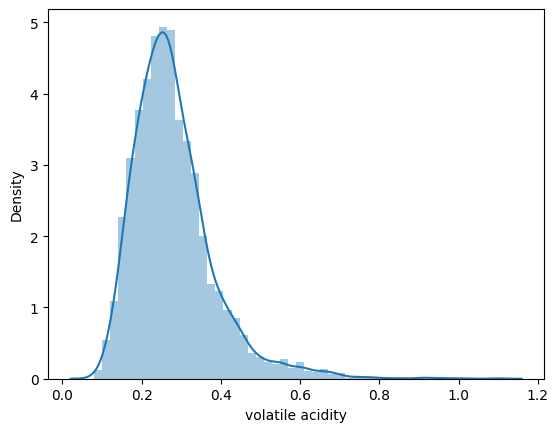

************


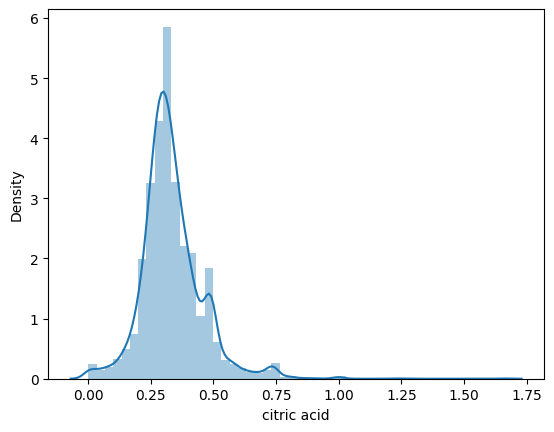

************


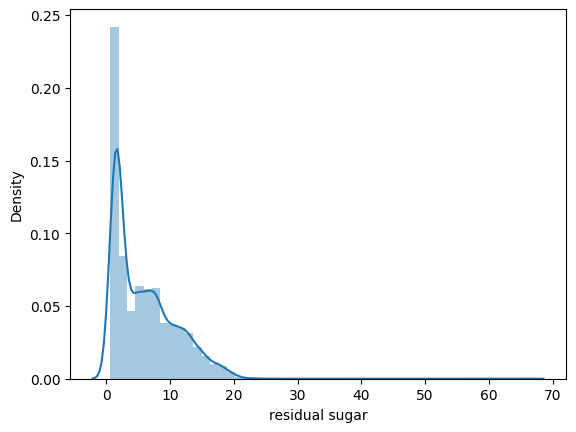

************


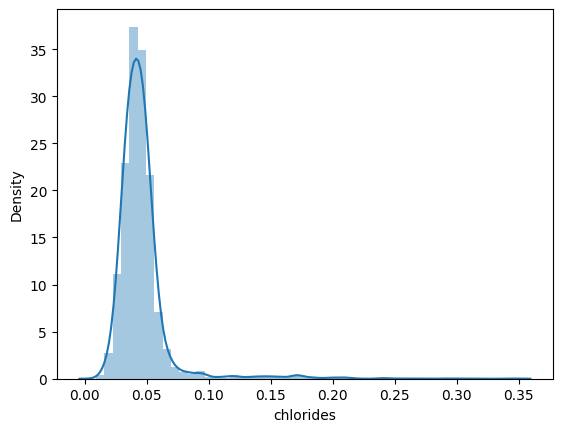

************


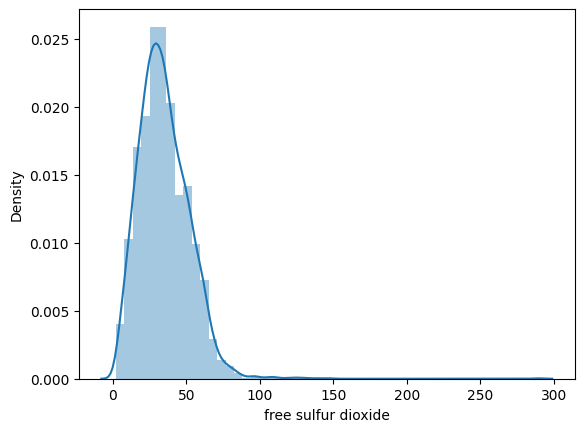

************


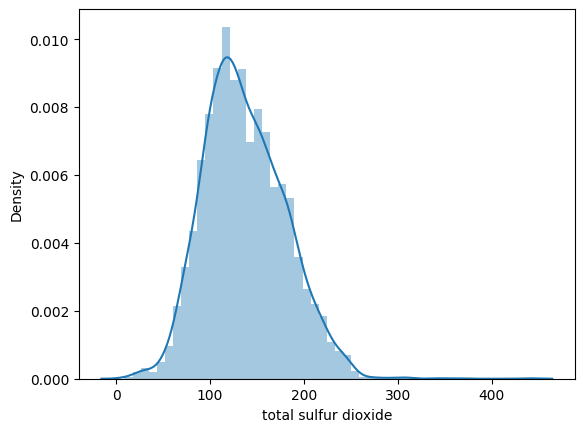

************


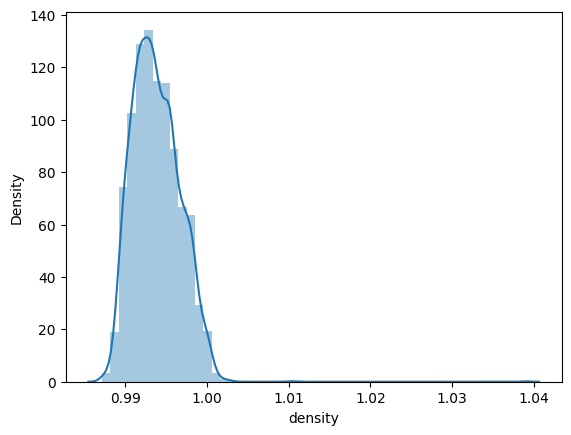

************


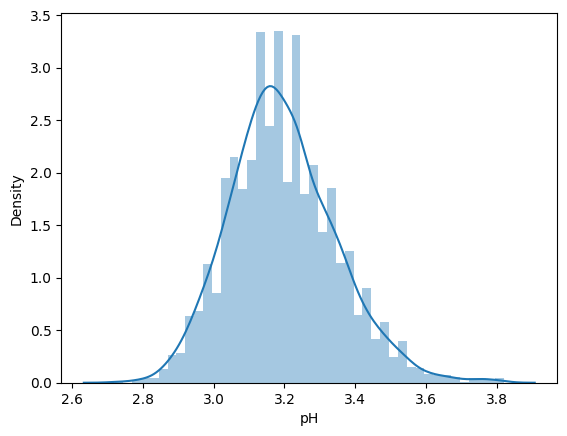

************


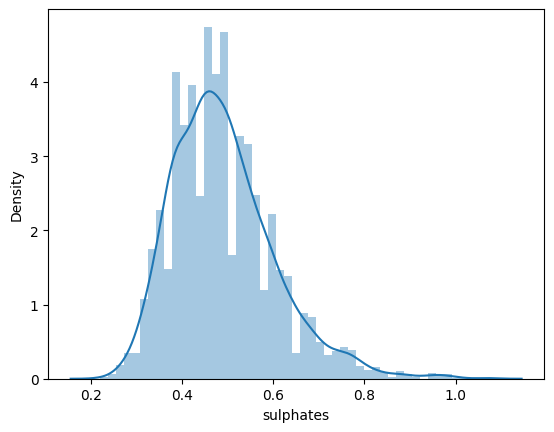

************


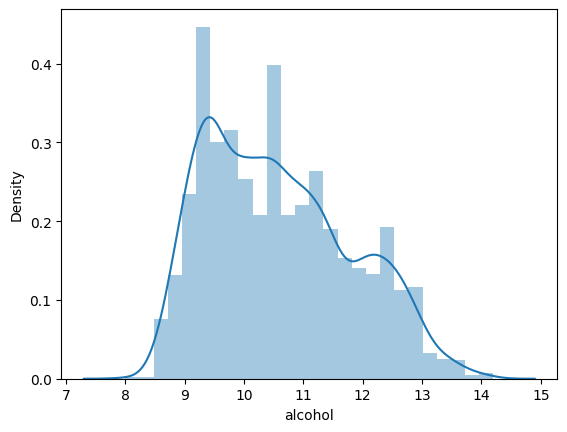

In [ ]:
#seeing the distributions of the dataset
for i in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]:
  sns.distplot(df[i])
  print("************")
  plt.show()

In [ ]:
numeric = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [ ]:
numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


************


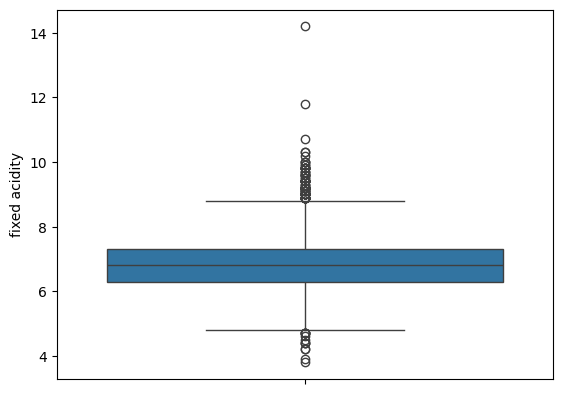

************


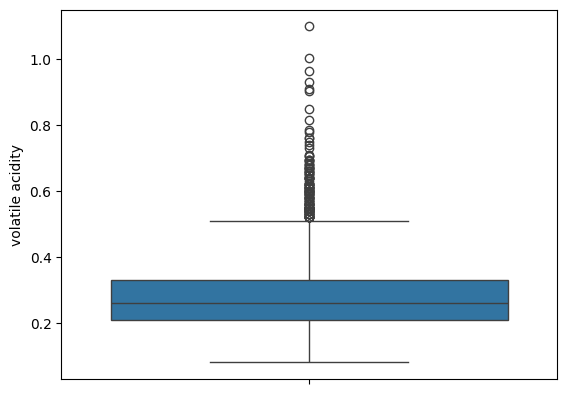

************


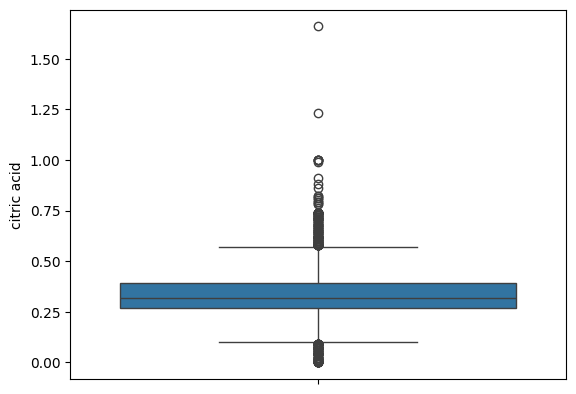

************


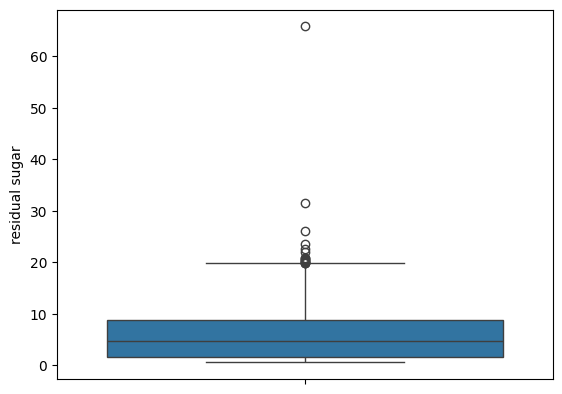

************


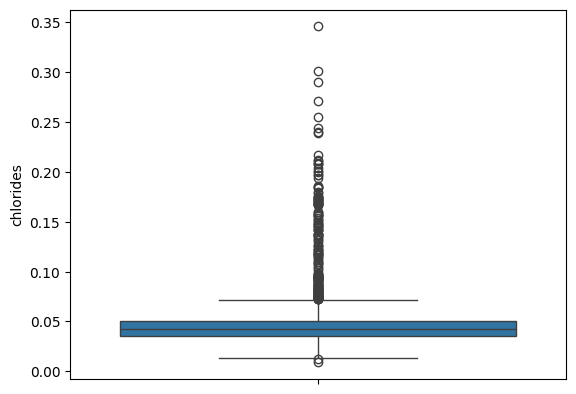

************


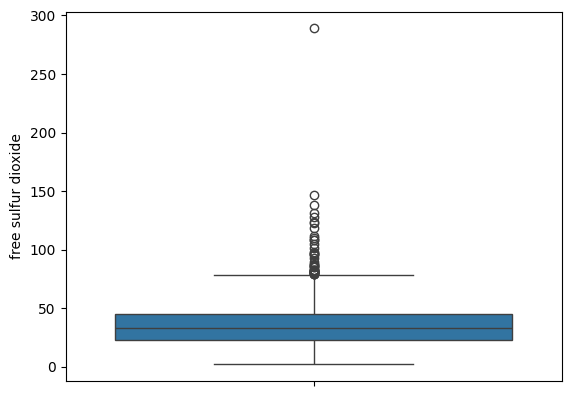

************


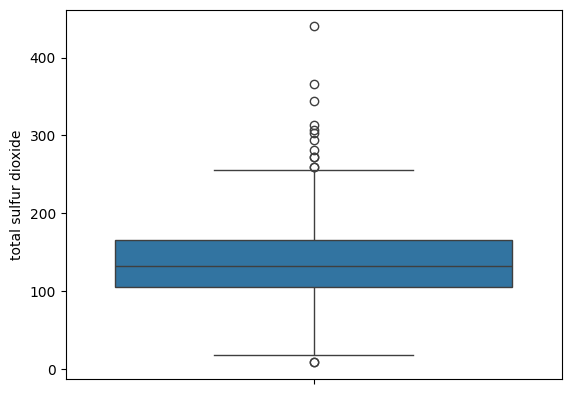

************


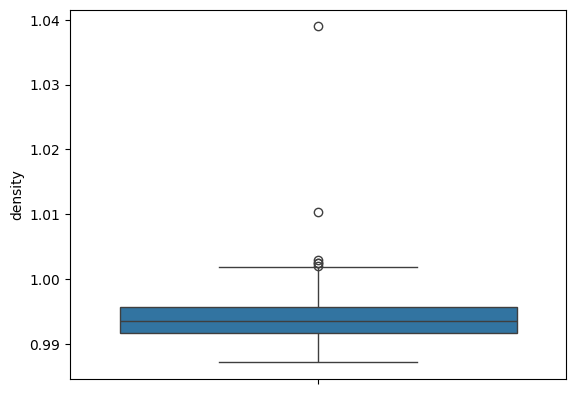

************


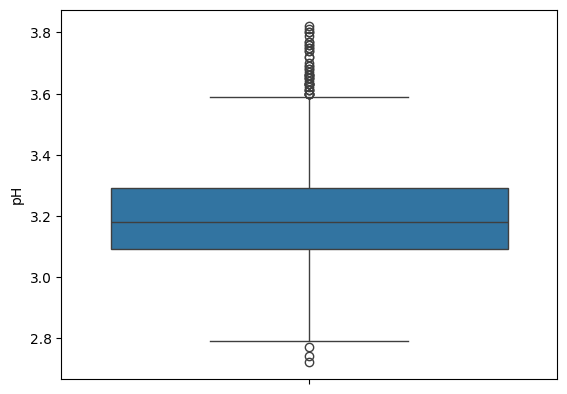

************


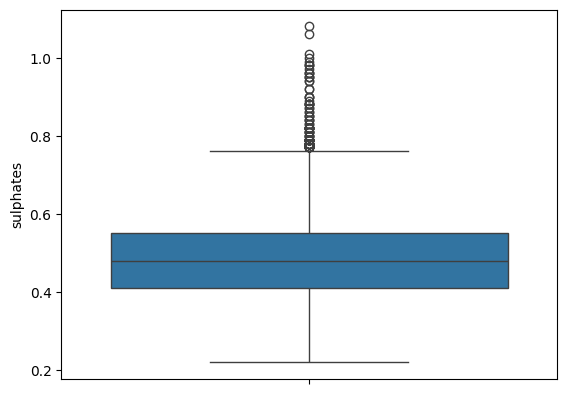

************


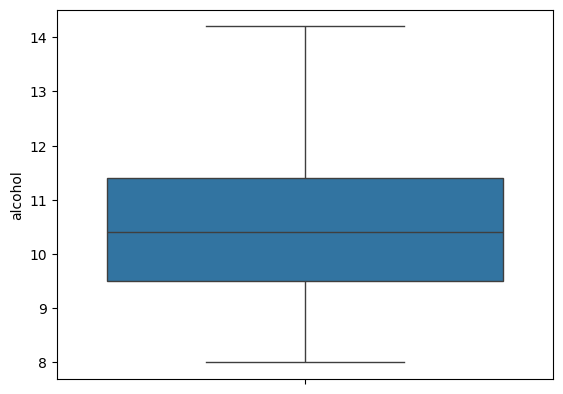

In [ ]:
for i in numeric:
  sns.boxplot(df[i])
  print("************")
  plt.show()

In [ ]:
#handling ourliers using IQR method
for i in numeric:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  print(f"Upper limit for {i} is:",upper)
  print(f"Lower limit for {i} is:",lower)
  print()

Upper limit for fixed acidity is: 8.8
Lower limit for fixed acidity is: 4.8

Upper limit for volatile acidity is: 0.51
Lower limit for volatile acidity is: 0.029999999999999943

Upper limit for citric acid is: 0.5700000000000001
Lower limit for citric acid is: 0.09000000000000002

Upper limit for residual sugar is: 19.85
Lower limit for residual sugar is: -9.350000000000001

Upper limit for chlorides is: 0.07250000000000001
Lower limit for chlorides is: 0.012500000000000004

Upper limit for free sulfur dioxide is: 78.0
Lower limit for free sulfur dioxide is: -10.0

Upper limit for total sulfur dioxide is: 256.0
Lower limit for total sulfur dioxide is: 16.0

Upper limit for density is: 1.001845
Lower limit for density is: 0.9854849999999999

Upper limit for pH is: 3.5900000000000003
Lower limit for pH is: 2.7899999999999996

Upper limit for sulphates is: 0.7600000000000001
Lower limit for sulphates is: 0.19999999999999987

Upper limit for alcohol is: 14.25
Lower limit for alcohol is: 6.

In [ ]:
#handling outlierrs using capping method
df.loc[df['fixed acidity']>8.8,'fixed acidity']=8.8
df.loc[df['volatile acidity']>0.51,'volatile acidity']=0.51
df.loc[df['citric acid']>0.57,'citric acid']=0.57
df.loc[df['residual sugar']>19.85,'residual sugar']=19.85
df.loc[df['chlorides']>0.07250000000000001,'chlorides']=0.07250000000000001
df.loc[df['free sulfur dioxide']>78,'free sulfur dioxide']=78
df.loc[df['total sulfur dioxide']>256,'total sulfur dioxide']=256
df.loc[df['density']>1.001845,'density']=1.001845
df.loc[df['pH']>3.59,'pH']=3.59
df.loc[df['sulphates']>0.76,'sulphates']=0.76
df.loc[df['alcohol']>14.25,'alcohol']=14.25

df.loc[df['fixed acidity']<4.8,'fixed acidity']=4.8
df.loc[df['volatile acidity']<0.029,'volatile acidity']=0.029
df.loc[df['citric acid']<0.09,'citric acid']=0.09
df.loc[df['residual sugar']<-9.35,'residual sugar']=-9.35
df.loc[df['chlorides']<0.0125,'chlorides']=0.0125
df.loc[df['free sulfur dioxide']<-10.0,'free sulfur dioxide']=-10.0
df.loc[df['total sulfur dioxide']<16.0,'total sulfur dioxide']=16.0
df.loc[df['density']< 0.9854,'density']= 0.9854
df.loc[df['pH']<2.789,'pH']=2.789
df.loc[df['sulphates']<0.19,'sulphates']=0.19
df.loc[df['alcohol']<6.65,'alcohol']=6.65

************


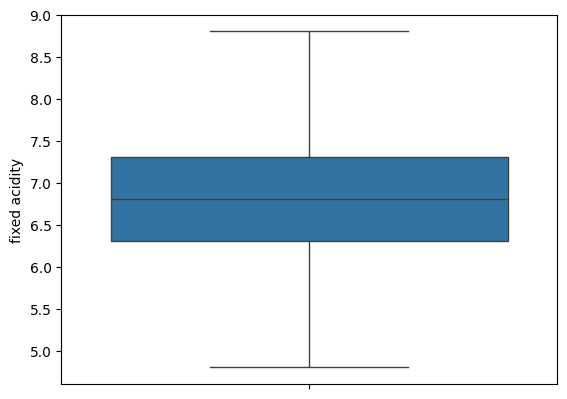

************


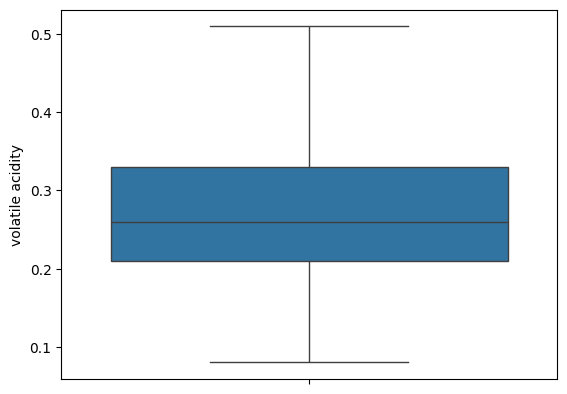

************


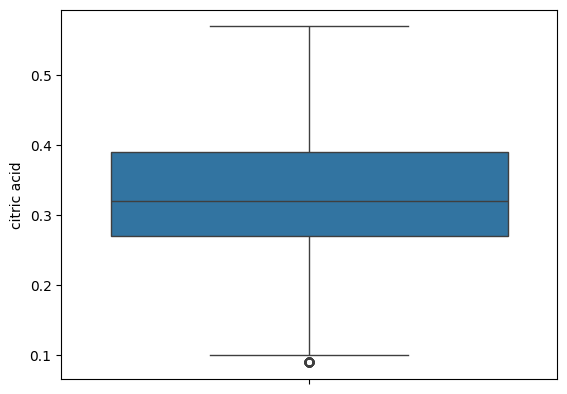

************


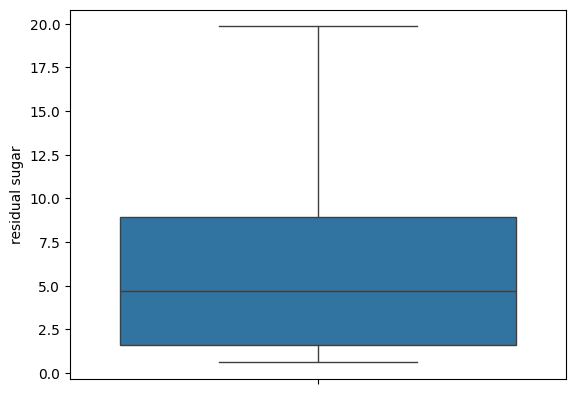

************


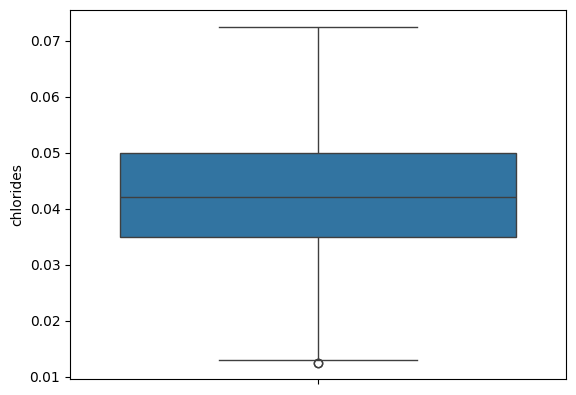

************


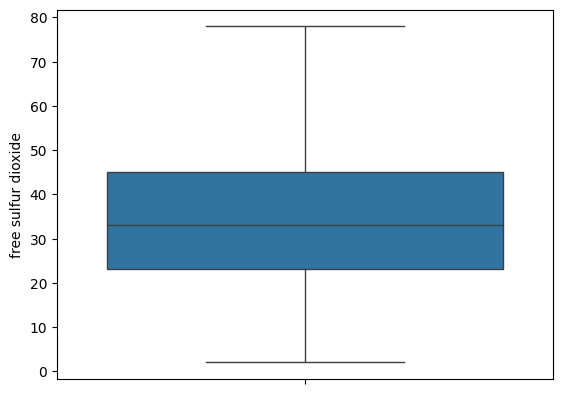

************


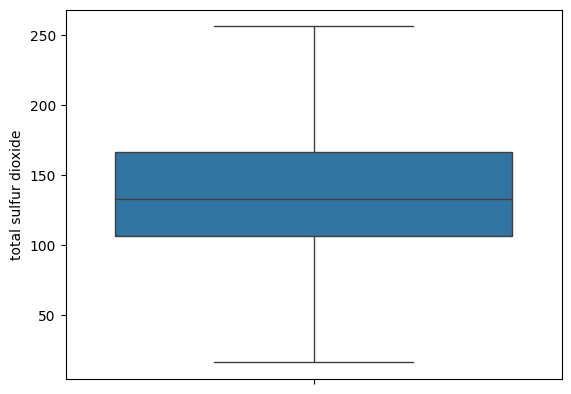

************


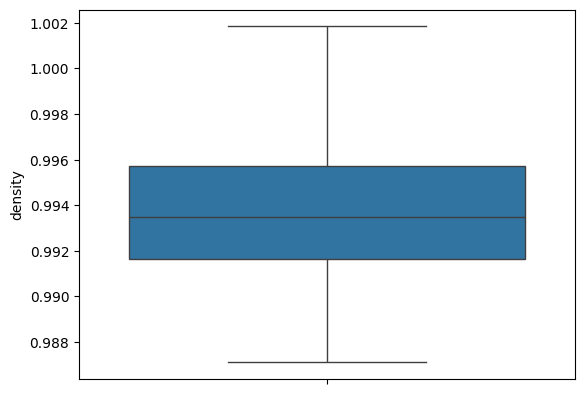

************


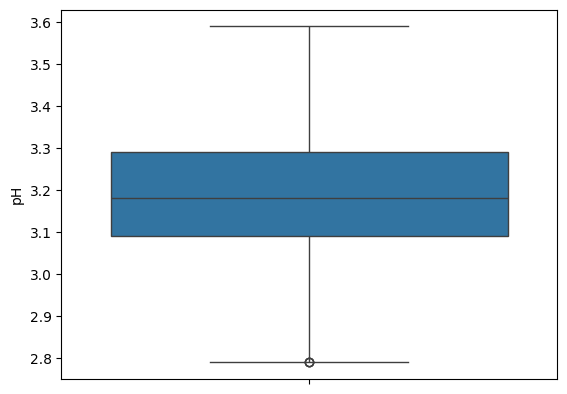

************


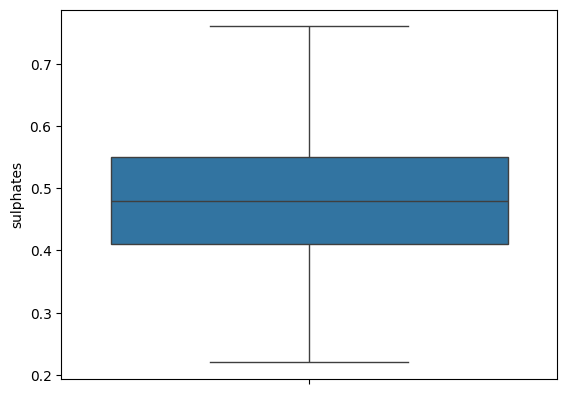

************


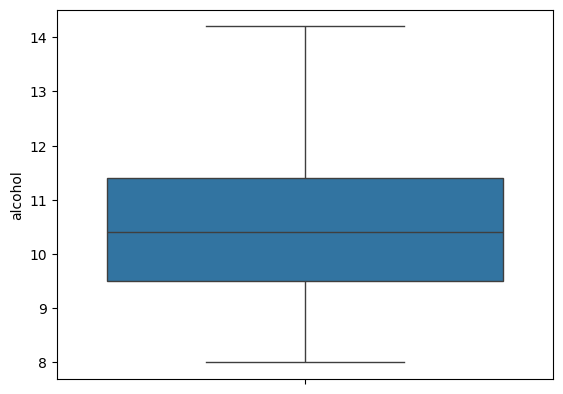

In [ ]:
for i in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]:
  sns.boxplot(df[i])
  print("************")
  plt.show()

************


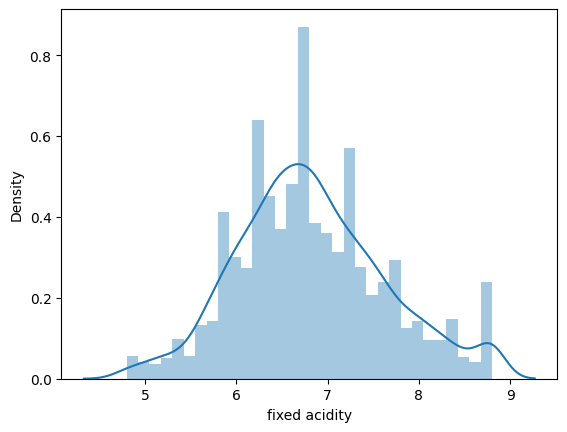

************


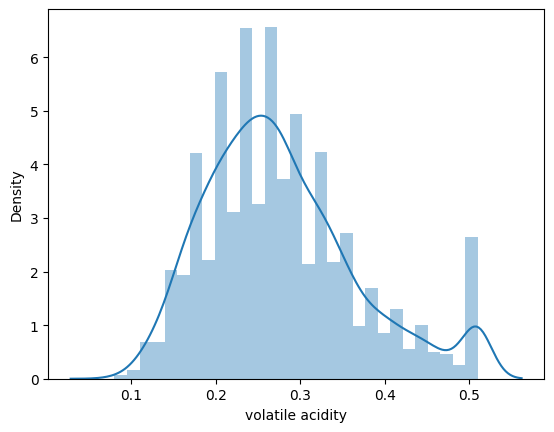

************


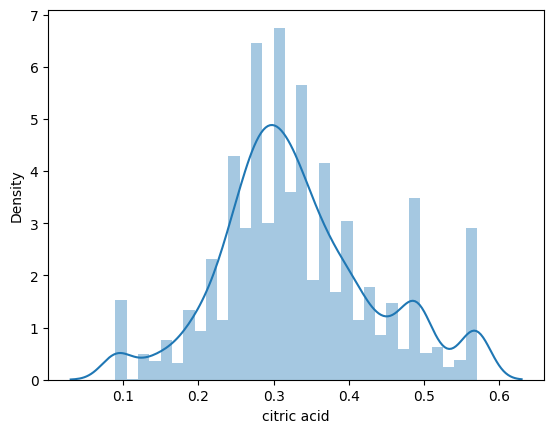

************


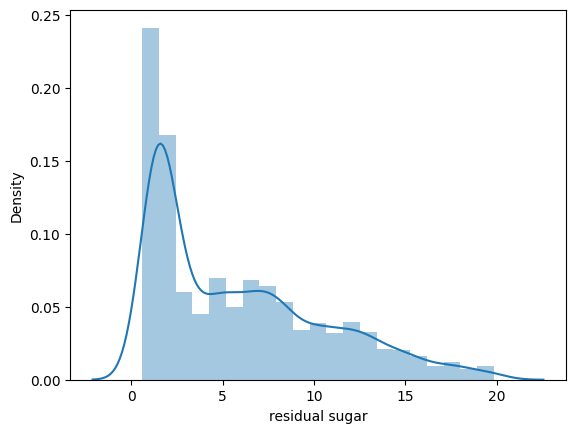

************


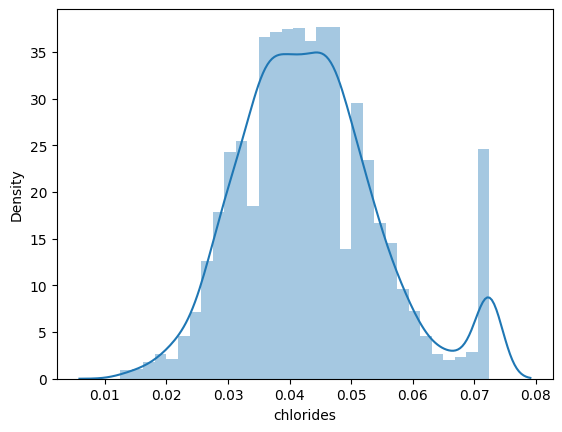

************


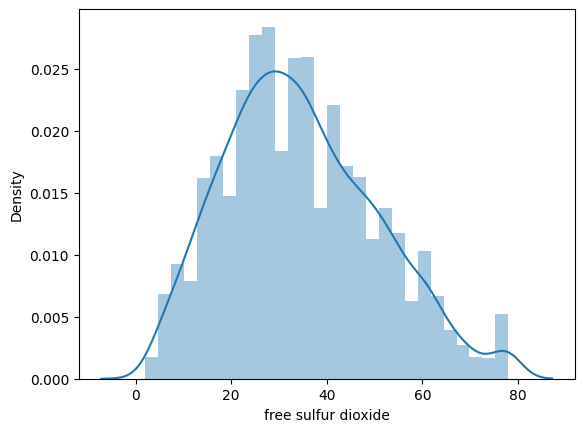

************


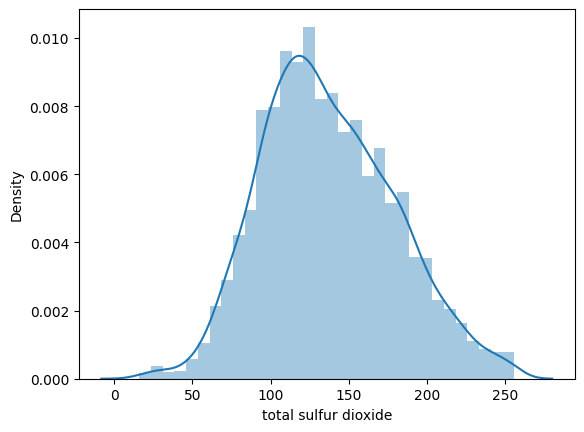

************


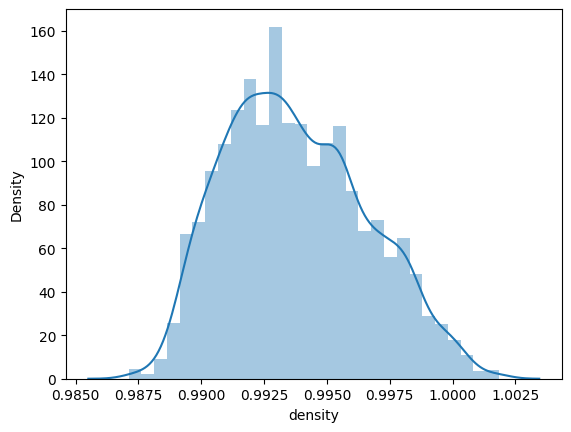

************


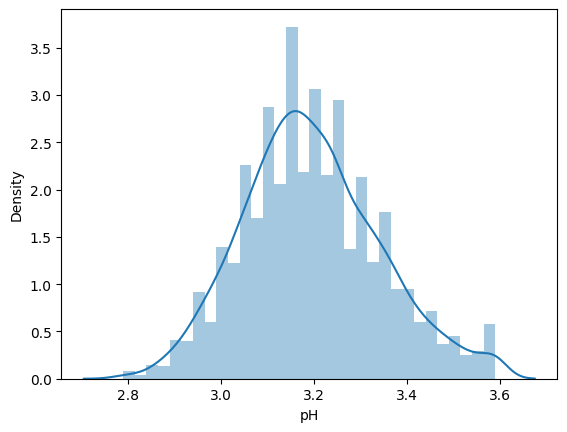

************


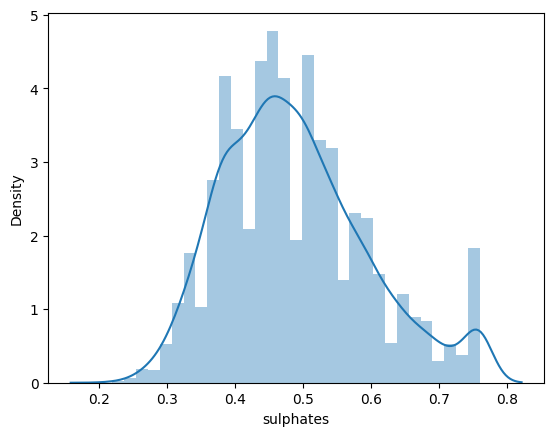

************


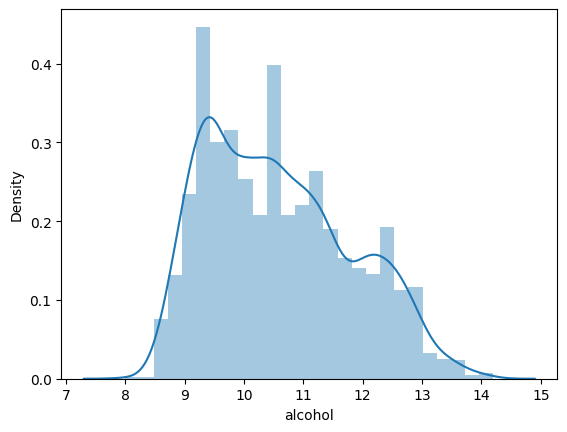

In [ ]:
for i in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]:
  sns.distplot(df[i])
  print("************")
  plt.show()

In [ ]:
#testing the skewness of the data
for col in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]:
    print(f"\nProcessing column for kurtosis calculation: {col}")
    kurtosis_value = df[col].kurtosis()
    print(f"Kurtosis of '{col}': {kurtosis_value}")
    if kurtosis_value > 0:
        print(f"'{col}' is Leptokurtic (heavy tails of outliers).")
    elif kurtosis_value == 0:
        print(f"'{col}' is Mesokurtic (normal distribution).")
    else:
        print(f"'{col}' is Platykurtic (light tails of outliers).")

    print(f"\nProcessing column for calculating skewness: {col}")
    skewness_value = df[col].skew()
    print(f"Skewness of '{col}': {skewness_value}")
    if skewness_value > 1:
        print(f"'{col}' is Highly Positively Skewed(Right Skewed).")
    elif 0.5 < skewness_value <= 1:
        print(f"'{col}' is Moderately Positively Skewed.")
    elif -0.5 <= skewness_value <= 0.5:
        print(f"'{col}' is Approximately Symmetric.")
    elif -1 <= skewness_value < -0.5:
        print(f"'{col}' is Moderately Negatively Skewed(Left Skewed).")
    else:
        print(f"'{col}' is Highly Negatively Skewed.")


Processing column for kurtosis calculation: fixed acidity
Kurtosis of 'fixed acidity': -0.05492394916987209
'fixed acidity' is Platykurtic (light tails of outliers).

Processing column for calculating skewness: fixed acidity
Skewness of 'fixed acidity': 0.2980772160335786
'fixed acidity' is Approximately Symmetric.

Processing column for kurtosis calculation: volatile acidity
Kurtosis of 'volatile acidity': 0.21908694245163085
'volatile acidity' is Leptokurtic (heavy tails of outliers).

Processing column for calculating skewness: volatile acidity
Skewness of 'volatile acidity': 0.7264868382477286
'volatile acidity' is Moderately Positively Skewed.

Processing column for kurtosis calculation: citric acid
Kurtosis of 'citric acid': 0.07822604627141905
'citric acid' is Leptokurtic (heavy tails of outliers).

Processing column for calculating skewness: citric acid
Skewness of 'citric acid': 0.3345116153633843
'citric acid' is Approximately Symmetric.

Processing column for kurtosis calcu

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,19.85,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
px.scatter(df,x=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [ ]:
#checking for the imbalance in the categorical variable
px.bar(df['quality'].value_counts())

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
x,y = smote.fit_resample(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']],df['quality'])

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.000000,0.270000,0.360000,19.850000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000
4,6.200000,0.320000,0.160000,7.000000,0.045000,30.000000,136.000000,0.994900,3.180000,0.470000,9.600000
...,...,...,...,...,...,...,...,...,...,...,...
12511,7.169535,0.255364,0.459868,2.153643,0.031768,30.072866,119.026373,0.990358,3.349139,0.433907,12.807287
12512,8.258365,0.266814,0.462744,7.923685,0.034044,28.955827,120.495301,0.994865,3.254164,0.447256,11.196522
12513,7.080712,0.269644,0.475534,2.392883,0.030650,33.507480,113.578649,0.990252,3.361320,0.414214,12.880712
12514,6.638820,0.352236,0.305528,1.646584,0.021854,24.543485,87.173942,0.989700,3.406894,0.595248,12.438820


In [ ]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
12511,9
12512,9
12513,9
12514,9


In [ ]:
df = pd.concat([x,y],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,19.850000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,6.200000,0.320000,0.160000,7.000000,0.045000,30.000000,136.000000,0.994900,3.180000,0.470000,9.600000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
12511,7.169535,0.255364,0.459868,2.153643,0.031768,30.072866,119.026373,0.990358,3.349139,0.433907,12.807287,9
12512,8.258365,0.266814,0.462744,7.923685,0.034044,28.955827,120.495301,0.994865,3.254164,0.447256,11.196522,9
12513,7.080712,0.269644,0.475534,2.392883,0.030650,33.507480,113.578649,0.990252,3.361320,0.414214,12.880712,9
12514,6.638820,0.352236,0.305528,1.646584,0.021854,24.543485,87.173942,0.989700,3.406894,0.595248,12.438820,9


In [ ]:
px.bar(df['quality'].value_counts())

#Feature Selection

Numeric vs Numeric -----> Scatter Plot -----> Correlation Matrix

Numerical vs Categorical -----> Bar Plot -----> Anova

Categorical vs Categorical  -----> Grouped Bar Plot -----> Chi2-Test

In [ ]:
df.corr(method='spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.022606,0.401289,0.161384,0.016713,-0.108178,0.072223,0.339871,-0.380028,-0.063853,-0.106621,-0.031516
volatile acidity,0.022606,1.000000,-0.164907,0.067738,0.041751,-0.117976,0.008073,0.014287,-0.048028,-0.039327,0.029454,-0.177568
citric acid,0.401289,-0.164907,1.000000,0.072762,-0.171993,-0.007760,-0.016972,0.034451,-0.068550,-0.050862,0.128555,0.241561
residual sugar,0.161384,0.067738,0.072762,1.000000,0.175486,0.306221,0.414614,0.649560,-0.234292,0.032252,-0.277492,-0.003524
chlorides,0.016713,0.041751,-0.171993,0.175486,1.000000,0.157341,0.442104,0.594415,-0.198115,0.179834,-0.691624,-0.531486
free sulfur dioxide,-0.108178,-0.117976,-0.007760,0.306221,0.157341,1.000000,0.648784,0.194340,0.078550,0.083760,-0.141860,0.109774
total sulfur dioxide,0.072223,0.008073,-0.016972,0.414614,0.442104,0.648784,1.000000,0.544168,0.006058,0.207696,-0.444695,-0.178156
density,0.339871,0.014287,0.034451,0.649560,0.594415,0.194340,0.544168,1.000000,-0.247646,0.164091,-0.833417,-0.444821
pH,-0.380028,-0.048028,-0.068550,-0.234292,-0.198115,0.078550,0.006058,-0.247646,1.000000,0.113569,0.253336,0.273252
sulphates,-0.063853,-0.039327,-0.050862,0.032252,0.179834,0.083760,0.207696,0.164091,0.113569,1.000000,-0.142004,-0.027041


<Axes: >

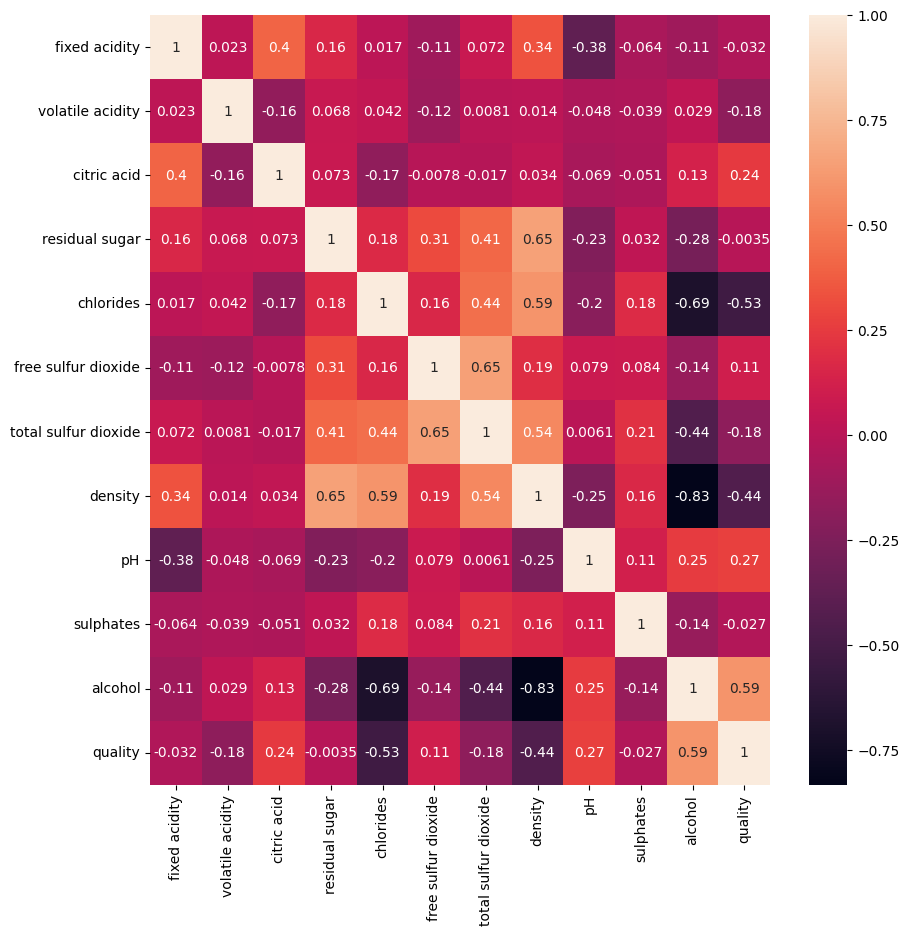

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [ ]:
spear = df.corr(method='spearman')
spear['quality'][abs(spear['quality']) > 0.25 ]

,quality
chlorides,-0.531486
density,-0.444821
pH,0.273252
alcohol,0.593756
quality,1.000000


In [ ]:
df.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.025893,0.389180,0.176980,0.064264,-0.116468,0.063704,0.368173,-0.421675,-0.063488,-0.142832,-0.054050
volatile acidity,0.025893,1.000000,-0.216751,0.047433,0.118661,-0.105378,0.082492,0.064022,-0.070622,-0.020693,-0.002400,-0.221800
citric acid,0.389180,-0.216751,1.000000,0.095549,-0.120528,-0.008231,-0.010586,0.081360,-0.108299,-0.024659,0.098443,0.225399
residual sugar,0.176980,0.047433,0.095549,1.000000,0.259807,0.261157,0.399118,0.756832,-0.276394,0.032189,-0.367847,-0.079605
chlorides,0.064264,0.118661,-0.120528,0.259807,1.000000,0.128464,0.444202,0.566844,-0.174940,0.155665,-0.654198,-0.496897
free sulfur dioxide,-0.116468,-0.105378,-0.008231,0.261157,0.128464,1.000000,0.681855,0.207717,0.102508,0.117658,-0.164038,0.042927
total sulfur dioxide,0.063704,0.082492,-0.010586,0.399118,0.444202,0.681855,1.000000,0.530896,0.030435,0.241383,-0.425795,-0.220813
density,0.368173,0.064022,0.081360,0.756832,0.566844,0.207717,0.530896,1.000000,-0.232024,0.158848,-0.810678,-0.425084
pH,-0.421675,-0.070622,-0.108299,-0.276394,-0.174940,0.102508,0.030435,-0.232024,1.000000,0.118312,0.221636,0.249799
sulphates,-0.063488,-0.020693,-0.024659,0.032189,0.155665,0.117658,0.241383,0.158848,0.118312,1.000000,-0.109969,-0.024073


<Axes: >

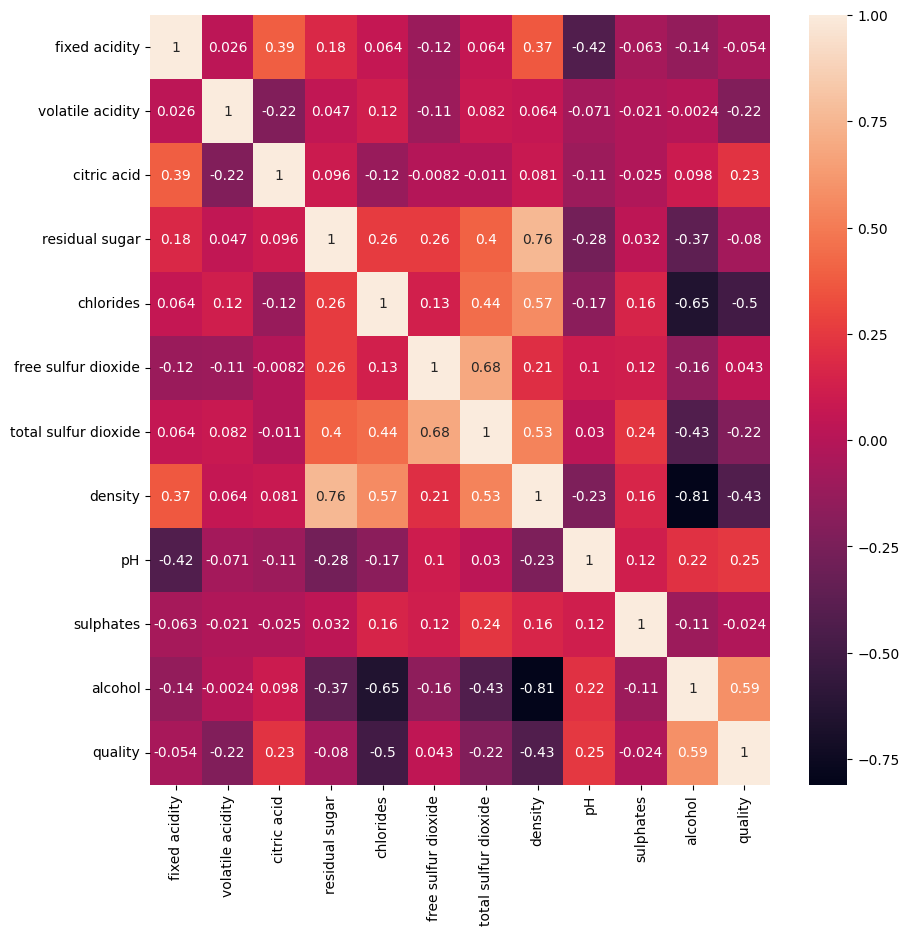

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [ ]:
pear = df.corr(method='pearson')
pear['quality'][abs(pear['quality']) > 0.25 ]

,quality
chlorides,-0.496897
density,-0.425084
alcohol,0.589648
quality,1.000000


#ANOVA
Assumption(H0):

There is NO relation between the given variables

if p-value > 0.05 ----> H0

if p-value < 0.05 ----> HA

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
FunctionAnova(inpData=df, TargetVariable='quality', ContinuousPredictorList=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']])

##### ANOVA Results ##### 

fixed acidity is correlated with quality | P-Value: 0.0
volatile acidity is correlated with quality | P-Value: 5.2691974047556e-309
citric acid is correlated with quality | P-Value: 0.0
residual sugar is correlated with quality | P-Value: 1.1667864008990054e-122
chlorides is correlated with quality | P-Value: 0.0
free sulfur dioxide is correlated with quality | P-Value: 7.51872043915917e-186
total sulfur dioxide is correlated with quality | P-Value: 1.4416195512522655e-256
density is correlated with quality | P-Value: 0.0
pH is correlated with quality | P-Value: 4.488653422587865e-229
sulphates is correlated with quality | P-Value: 1.0386922843273879e-45
alcohol is correlated with quality | P-Value: 0.0


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']